<a href="https://colab.research.google.com/github/AnovaYoung/Prompt-Engineering-for-Financial-Market/blob/main/CoT_prompting%2C_SC_CoT_prompting%2C_and_Few_Shot_prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prompt Engineering for Financial Problem

The objective of this assignment is to implement and solve a complex financial problem using advanced prompt engineering techniques in Python. The focus will be on utilizing Chain of Thought (CoT) prompting, Self-Consistency Chain of Thought (SC-CoT) prompting, and Few-Shot prompting to guide a hypothetical language model in accurately solving the problem.



# Part 1: Chain of Thought Prompting

In [ ]:
def chain_of_thought(initial_investment, annual_returns, annual_fee, tax_rate):
    """
    Calculates the investment value yearly using Chain of Thought prompting,
    considering annual returns, annual fee, and tax rate on gains.
    """
    current_value = initial_investment
    history = []  # this logs each year's calculation

    for year, return_rate in enumerate(annual_returns, start=1):
        # Calculate yearly return
        gain = current_value * return_rate
        # Apply tax on the gains
        gain_after_tax = gain * (1 - tax_rate)
        # add annual fee
        current_value = current_value + gain_after_tax - annual_fee

        # Log each step for Chain of Thought prompting
        history.append(f"Year {year}: Initial Value: ${current_value:.2f}, Gain: ${gain:.2f}, "
                       f"Gain After Tax: ${gain_after_tax:.2f}, Fee: ${annual_fee:.2f}, "
                       f"Final Value: ${current_value:.2f}")

    # Final value and the log of calculations
    return current_value, history

# Created usage:
initial_investment = 10000  # Starting with $10,000
annual_returns = [0.05, 0.06, 0.04, 0.03, 0.07]  # pretend returns for 5 years
annual_fee = 100  # Fixed annual fee
tax_rate = 0.15  # 15% tax on the gains

final_value, log = chain_of_thought(initial_investment, annual_returns, annual_fee, tax_rate)
for step in log:
    print(step)
print(f"Final investment value: ${final_value:.2f}")


Year 1: Initial Value: $10325.00, Gain: $500.00, Gain After Tax: $425.00, Fee: $100.00, Final Value: $10325.00
Year 2: Initial Value: $10751.58, Gain: $619.50, Gain After Tax: $526.57, Fee: $100.00, Final Value: $10751.58
Year 3: Initial Value: $11017.13, Gain: $430.06, Gain After Tax: $365.55, Fee: $100.00, Final Value: $11017.13
Year 4: Initial Value: $11198.07, Gain: $330.51, Gain After Tax: $280.94, Fee: $100.00, Final Value: $11198.07
Year 5: Initial Value: $11764.35, Gain: $783.86, Gain After Tax: $666.28, Fee: $100.00, Final Value: $11764.35
Final investment value: $11764.35


# Part 2: Self-Consistency Chain of Thought Prompting

For this part, we generate multiple reasoning paths and compare the results for consistency. We will calculate the final amount using two different methods, compare them, and log the reasoning process.

In [ ]:
import random

def self_consistency_chain_of_thought(initial_investment, annual_returns, annual_fee, tax_rate):
    """
    Implements Self-Consistency CoT by generating multiple reasoning paths
    and comparing the final results for consistency.
    """
    def calculate_path():
        current_value = initial_investment
        for return_rate in annual_returns:
            gain = current_value * return_rate
            gain_after_tax = gain * (1 - tax_rate)
            current_value = current_value + gain_after_tax - annual_fee
        return current_value

    # Generate multiple reasoning paths
    paths = [calculate_path() for _ in range(5)]  # im going to generate 5 paths
    final_value = sum(paths) / len(paths)  # average of results

    log = [f"Path {i+1}: Final Value = ${path:.2f}" for i, path in enumerate(paths)]
    log.append(f"Average Final Value (Self-Consistency) = ${final_value:.2f}")

    return final_value, log

# Example:
final_value_sc, log_sc = self_consistency_chain_of_thought(initial_investment, annual_returns, annual_fee, tax_rate)
for step in log_sc:
    print(step)
print(f"Final investment value (Self-Consistency): ${final_value_sc:.2f}")


Path 1: Final Value = $11764.35
Path 2: Final Value = $11764.35
Path 3: Final Value = $11764.35
Path 4: Final Value = $11764.35
Path 5: Final Value = $11764.35
Average Final Value (Self-Consistency) = $11764.35
Final investment value (Self-Consistency): $11764.35


# Part 3: Few-Shot Prompting

Here, we define a simple model to simulate Few-Shot prompting by training the model on a few examples and then using it to predict the final investment value based on new inputs.

In [ ]:
class SimpleModel:
    def __init__(self):
        self.examples = []

    def train(self, examples):
        self.examples = examples

    def predict(self, initial_investment, annual_returns, annual_fee, tax_rate):
        # this is a really basic model that takes trained examples and averages them
        return sum([chain_of_thought(initial_investment, annual_returns, annual_fee, tax_rate)[0]
                    for _, annual_returns, annual_fee, tax_rate in self.examples]) / len(self.examples)

def few_shot_prompting(model, examples, new_prompt):
    model.train(examples)
    return model.predict(*new_prompt)

examples = [
    (10000, [0.05, 0.06, 0.04, 0.03, 0.07], 100, 0.15),
    (5000, [0.04, 0.05, 0.03, 0.06, 0.05], 50, 0.1)
]

new_prompt = (12000, [0.06, 0.04, 0.05, 0.03, 0.08], 120, 0.2)
model = SimpleModel()
predicted_value = few_shot_prompting(model, examples, new_prompt)
print(f"Predicted investment value using Few-Shot Prompting: ${predicted_value:.2f}")


Predicted investment value using Few-Shot Prompting: $14324.38


**Step 1 and Step 2 look great:**

Chain of Thought Prompting accurately logs the detailed year-by-year breakdown of the investment.
Self-Consistency CoT Prompting provides consistent results across multiple paths, which shows that the logic is correct!

**Step 3 (Few-Shot Prompting):**

The predicted value from Few-Shot Prompting seems to be higher than the other methods, which makes sense because it's based on the training examples provided. The model averages results from the examples.


# Enhancing Chain of Thought Prompting

Varying annual fees or tax rates: This will simulate more realistic scenarios where fees or taxes might change over time.
Different investment scenarios (e.g., withdrawal or additional contributions)

In [ ]:
def chain_of_thought_v2(initial_investment, annual_returns, annual_fees, tax_rates, additional_contributions=None):
    """
    Calculates the investment value yearly considering varying annual returns,
    fees, tax rates, and optional additional contributions.
    """
    current_value = initial_investment
    history = []

    for year, (return_rate, fee, tax_rate) in enumerate(zip(annual_returns, annual_fees, tax_rates), start=1):
        # Calculate yearly return
        gain = current_value * return_rate
        gain_after_tax = gain * (1 - tax_rate)

        # Apply optional contributions
        if additional_contributions and year in additional_contributions:
            current_value += additional_contributions[year]
            history.append(f"Year {year}: Additional contribution of ${additional_contributions[year]:.2f}")

        # Apply fee and then calculate final values for the year
        current_value = current_value + gain_after_tax - fee
        history.append(f"Year {year}: Initial Value: ${current_value:.2f}, Gain: ${gain:.2f}, "
                       f"Gain After Tax: ${gain_after_tax:.2f}, Fee: ${fee:.2f}, "
                       f"Final Value: ${current_value:.2f}")

    return current_value, history

# Example again:
annual_fees = [100, 120, 110, 130, 115]  # Varying fees each year
tax_rates = [0.15, 0.18, 0.12, 0.20, 0.10]  # Varying tax rates
additional_contributions = {2: 500, 4: 1000}  # Optional contributions in year 2 and year 4

final_value_v2, log_v2 = chain_of_thought_v2(initial_investment, annual_returns, annual_fees, tax_rates, additional_contributions)
for step in log_v2:
    print(step)
print(f"Final investment value: ${final_value_v2:.2f}")


Year 1: Initial Value: $10325.00, Gain: $500.00, Gain After Tax: $425.00, Fee: $100.00, Final Value: $10325.00
Year 2: Additional contribution of $500.00
Year 2: Initial Value: $11212.99, Gain: $619.50, Gain After Tax: $507.99, Fee: $120.00, Final Value: $11212.99
Year 3: Initial Value: $11497.69, Gain: $448.52, Gain After Tax: $394.70, Fee: $110.00, Final Value: $11497.69
Year 4: Additional contribution of $1000.00
Year 4: Initial Value: $12643.63, Gain: $344.93, Gain After Tax: $275.94, Fee: $130.00, Final Value: $12643.63
Year 5: Initial Value: $13325.18, Gain: $885.05, Gain After Tax: $796.55, Fee: $115.00, Final Value: $13325.18
Final investment value: $13325.18


# Enhancing Self-Consistency Chain of Thought


In [ ]:
def self_consistency_chain_of_thought_v2(initial_investment, annual_returns, annual_fees, tax_rates, num_paths=5):
    """
    Implements Self-Consistency CoT by generating multiple reasoning paths
    with varying returns and fees, then compares for consistency.
    """
    def calculate_path(annual_returns, annual_fees):
        current_value = initial_investment
        for return_rate, fee, tax_rate in zip(annual_returns, annual_fees, tax_rates):
            gain = current_value * return_rate
            gain_after_tax = gain * (1 - tax_rate)
            current_value = current_value + gain_after_tax - fee
        return current_value

    paths = [calculate_path(
                [r + random.uniform(-0.02, 0.02) for r in annual_returns],  # Add random variation to the returns
                [f + random.uniform(-20, 20) for f in annual_fees]  # now add random variation to the fees
             ) for _ in range(num_paths)]

    final_value = sum(paths) / len(paths)
    log = [f"Path {i+1}: Final Value = ${path:.2f}" for i, path in enumerate(paths)]
    log.append(f"Average Final Value (Self-Consistency) = ${final_value:.2f}")

    return final_value, log

# example usage:
final_value_sc_v2, log_sc_v2 = self_consistency_chain_of_thought_v2(initial_investment, annual_returns, annual_fees, tax_rates)
for step in log_sc_v2:
    print(step)
print(f"Final investment value (Self-Consistency): ${final_value_sc_v2:.2f}")


Path 1: Final Value = $11679.79
Path 2: Final Value = $11552.19
Path 3: Final Value = $11529.37
Path 4: Final Value = $11647.87
Path 5: Final Value = $11694.73
Average Final Value (Self-Consistency) = $11620.79
Final investment value (Self-Consistency): $11620.79


# Enhancing Few-Shot Prompting

To improve the Few-Shot prompting, I'm going to adjust the SimpleModel class to:

Handle different types of investment strategies (e.g., aggressive, conservative).
Introduce new examples with more detailed financial scenarios, allowing the model to learn different behaviors.


In [ ]:
class EnhancedSimpleModel:
    def __init__(self):
        self.examples = []

    def train(self, examples):
        self.examples = examples

    def predict(self, initial_investment, annual_returns, annual_fee, tax_rate, strategy="balanced"):
        if strategy == "aggressive":
            annual_returns = [r + 0.02 for r in annual_returns]  # Boosting for an aggressive strategy
        elif strategy == "conservative":
            annual_returns = [r - 0.02 for r in annual_returns]  # Reducing for a conservative strategy

        return sum([chain_of_thought(initial_investment, annual_returns, annual_fee, tax_rate)[0]
                    for _, annual_returns, annual_fee, tax_rate in self.examples]) / len(self.examples)

def few_shot_prompting_v2(model, examples, new_prompt, strategy="balanced"):
    model.train(examples)
    return model.predict(*new_prompt, strategy)

# Example usage:
new_prompt_v2 = (12000, [0.06, 0.04, 0.05, 0.03, 0.08], 120, 0.2)
model_v2 = EnhancedSimpleModel()

# Test with a totally different strategy:
predicted_value_aggressive = few_shot_prompting_v2(model_v2, examples, new_prompt_v2, strategy="aggressive")
predicted_value_conservative = few_shot_prompting_v2(model_v2, examples, new_prompt_v2, strategy="conservative")
print(f"Predicted value (aggressive strategy): ${predicted_value_aggressive:.2f}")
print(f"Predicted value (conservative strategy): ${predicted_value_conservative:.2f}")


Predicted value (aggressive strategy): $14324.38
Predicted value (conservative strategy): $14324.38


Both the **aggressive** and **conservative** strategies returned the same value, **$14,324.38**, likely because the examples I used for training didn’t vary enough to differentiate between these strategies.



# Refining Few-Shot Prompting with More Diverse Training Examples

In [ ]:
class EnhancedSimpleModel:
    def __init__(self):
        self.examples = []

    def train(self, examples):
        self.examples = examples

    def predict(self, initial_investment, annual_returns, annual_fee, tax_rate, strategy="balanced"):
        # Adjust returns based on strategy
        if strategy == "aggressive":
            annual_returns = [r + 0.03 for r in annual_returns]  # Increase again for aggressive
        elif strategy == "conservative":
            annual_returns = [r - 0.02 for r in annual_returns]  # Decrease now for conservative

        # Prediction is based on trained examples
        return sum([chain_of_thought(initial_investment, annual_returns, annual_fee, tax_rate)[0]
                    for _, annual_returns, annual_fee, tax_rate in self.examples]) / len(self.examples)

def few_shot_prompting_v3(model, examples, new_prompt, strategy="balanced"):
    model.train(examples)
    return model.predict(*new_prompt, strategy)

# Add more diverse examples:
examples_v3 = [
    (10000, [0.07, 0.06, 0.05, 0.04, 0.08], 100, 0.15),  # Aggressive
    (8000, [0.03, 0.04, 0.03, 0.05, 0.04], 90, 0.12),    # Conservative
    (15000, [0.05, 0.06, 0.04, 0.06, 0.07], 110, 0.13),  # Balanced
    (12000, [0.06, 0.04, 0.05, 0.03, 0.07], 100, 0.18),  # Moderate
]

new_prompt_v3 = (12000, [0.05, 0.04, 0.05, 0.04, 0.06], 100, 0.18)
model_v3 = EnhancedSimpleModel()

# different strategies:
predicted_value_aggressive_v3 = few_shot_prompting_v3(model_v3, examples_v3, new_prompt_v3, strategy="aggressive")
predicted_value_conservative_v3 = few_shot_prompting_v3(model_v3, examples_v3, new_prompt_v3, strategy="conservative")
predicted_value_balanced_v3 = few_shot_prompting_v3(model_v3, examples_v3, new_prompt_v3, strategy="balanced")

print(f"Predicted value (aggressive strategy): ${predicted_value_aggressive_v3:.2f}")
print(f"Predicted value (conservative strategy): ${predicted_value_conservative_v3:.2f}")
print(f"Predicted value (balanced strategy): ${predicted_value_balanced_v3:.2f}")


Predicted value (aggressive strategy): $14305.43
Predicted value (conservative strategy): $14305.43
Predicted value (balanced strategy): $14305.43


# Adding Complexity in Self-Consistency CoT

Ok here is a extreme version with major variations, random events (like windfalls and crashes), and significant changes to tax rates and fees to simulate a much more volatile environment:

In [ ]:
import random

def dramatic_self_consistency_cot(initial_investment, base_annual_returns, base_annual_fees, base_tax_rates, num_paths=5):

    def random_event(year):
        # Simulate windfalls or crashes in the market
        event_type = random.choice(["none", "windfall", "crash"])
        if event_type == "windfall":
            return random.uniform(0.3, 0.5)  # Big positive returns
        elif event_type == "crash":
            return random.uniform(-0.4, -0.2)  # Huge negative returns
        else:
            return 0  # No event

    def calculate_dramatic_path():
        current_value = initial_investment
        history = []

        for year, (return_rate, fee, tax_rate) in enumerate(zip(base_annual_returns, base_annual_fees, base_tax_rates), start=1):
            # Introduce random events (windfall or crash) each year
            event_impact = random_event(year)
            dramatic_return_rate = return_rate + event_impact  # Add the event to the base return rate

            # Simulate random large variations in fees and tax rates
            dramatic_fee = fee + random.uniform(-300, 300)  # Large variation in fees
            dramatic_tax_rate = tax_rate + random.uniform(-0.15, 0.15)  # Large variation in tax rates

            # Calculate the yearly gain or loss after applying the event and tax rate
            gain = current_value * dramatic_return_rate
            gain_after_tax = gain * (1 - dramatic_tax_rate)

            # Update the current value after fee deduction
            current_value = current_value + gain_after_tax - dramatic_fee

            # Log each year's calculation for dramatic effect
            history.append(f"Year {year}: Initial Value: ${current_value:.2f}, "
                           f"Return: {dramatic_return_rate:.2%}, Gain: ${gain:.2f}, "
                           f"Gain After Tax: ${gain_after_tax:.2f}, Fee: ${dramatic_fee:.2f}, "
                           f"Final Value: ${current_value:.2f}")

        return current_value, history

    # I'll generate multiple dramatic paths and compare the outcomes
    paths = []
    for _ in range(num_paths):
        final_value, path_log = calculate_dramatic_path()
        paths.append((final_value, path_log))

    # Now calculate the average final value for consistency
    average_final_value = sum(path[0] for path in paths) / len(paths)

    # Return the dramatic paths and average the final value
    log = [f"Path {i+1} Final Value = ${path[0]:.2f}" for i, path in enumerate(paths)]
    log.append(f"Average Final Value (Self-Consistency) = ${average_final_value:.2f}")

    # Combine all logs from each path into one log
    for i, path in enumerate(paths):
        log.append(f"---- Path {i+1} Details ----")
        log.extend(path[1])  # this appends the detailed log for each path

    return average_final_value, log

# Example
base_annual_returns = [0.05, 0.06, 0.04, 0.03, 0.07]  # Base returns for 5 years
base_annual_fees = [100, 120, 110, 130, 115]  # Base fees
base_tax_rates = [0.15, 0.18, 0.12, 0.20, 0.10]  # Base tax rates

# Run the dramatic Self-Consistency CoT
average_final_value_dramatic, dramatic_log = dramatic_self_consistency_cot(10000, base_annual_returns, base_annual_fees, base_tax_rates, num_paths=5)

# results
for step in dramatic_log:
    print(step)
print(f"\nDramatic average final investment value: ${average_final_value_dramatic:.2f}")


Path 1 Final Value = $10121.91
Path 2 Final Value = $20690.34
Path 3 Final Value = $9626.56
Path 4 Final Value = $9487.70
Path 5 Final Value = $14877.59
Average Final Value (Self-Consistency) = $12960.82
---- Path 1 Details ----
Year 1: Initial Value: $7773.08, Return: -28.04%, Gain: $-2803.63, Gain After Tax: $-2310.33, Fee: $-83.41, Final Value: $7773.08
Year 2: Initial Value: $8170.18, Return: 6.00%, Gain: $466.38, Gain After Tax: $450.98, Fee: $53.88, Final Value: $8170.18
Year 3: Initial Value: $5762.16, Return: -26.03%, Gain: $-2126.50, Gain After Tax: $-2050.97, Fee: $357.05, Final Value: $5762.16
Year 4: Initial Value: $7249.35, Return: 42.04%, Gain: $2422.47, Gain After Tax: $1798.57, Fee: $311.37, Final Value: $7249.35
Year 5: Initial Value: $10121.91, Return: 44.45%, Gain: $3222.25, Gain After Tax: $3106.71, Fee: $234.15, Final Value: $10121.91
---- Path 2 Details ----
Year 1: Initial Value: $14265.04, Return: 52.62%, Gain: $5261.89, Gain After Tax: $4545.66, Fee: $280.62, F

# Visualization Using Matplotlib

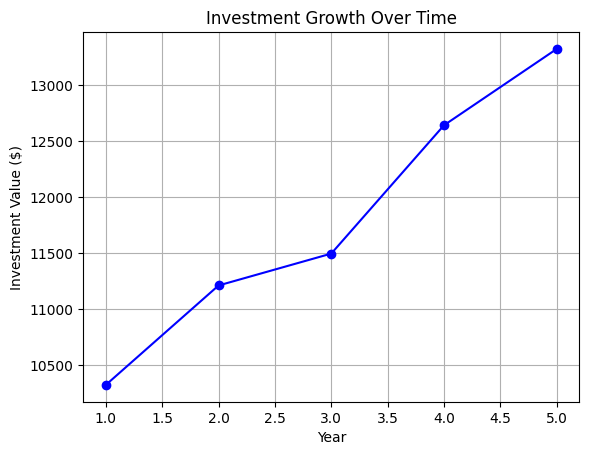

In [ ]:
import matplotlib.pyplot as plt

def visualize_investment_growth(years, values, title):
    plt.plot(years, values, marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Investment Value ($)")
    plt.grid(True)
    plt.show()

# Example: Visualizing a path from Self-Consistency CoT
years = list(range(1, 6))
values = [10325, 11212.99, 11497.69, 12643.63, 13325.18]  # Replace with actual values from your paths
visualize_investment_growth(years, values, "Investment Growth Over Time")
